Hard Additional Requirement 2

The aim of this additional requirment is to analyse some other data sets.

The data set being analysed in this notebook is data that NASA has collected: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh. A discription of each of the columns is available at: https://www.kaggle.com/nasa/meteorite-landings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from ipywidgets import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
from operator import itemgetter

import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.plotly as py

from ipywidgets import widgets 
from IPython.display import display
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
init_notebook_mode(connected=True)

from scipy.misc import imread

/cs/home/ea50/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/cs/home/ea50/.local/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
df=pd.read_csv("Meteorite_Landings.csv")

First refining of the data is done, so any rows which is a duplicate, or has a 'None' value is dropped.

In [3]:
refinedNASA = df.copy()
refinedNASA = refinedNASA.dropna()
refinedNASA = refinedNASA.drop_duplicates()

Then the only two columns which have a limited number of possible values are checked, and any row which has invalid values also gets dropped.

In [4]:
fallarray = ['Fell', 'Found']
nametypearray = ['Valid', 'Relict']

rowsToRemove = []

rCounter = 0
falls = refinedNASA['fall']
for fa in falls:
    flag = 1
    for f in fallarray:
                if f == fa:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
types = refinedNASA['nametype']  
for typ in types:
    flag = 1
    for name in nametypearray:
                if name == typ:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
     
rowsToRemove.sort(reverse=True)

for i in rowsToRemove:
    refinedNASA = refinedNASA.drop(refinedNASA.index[[i]])

refinedNASA.to_csv("refinedNASA.csv")


Finding all the possible values for each column and their occurances, all except 'name' and 'id'.

In [26]:
nametype = refinedNASA.groupby('nametype')
nametype.size()

nametype
Relict       21
Valid     38095
dtype: int64

In [27]:
recclass = refinedNASA.groupby('recclass')
recclass.size()

recclass
Acapulcoite               37
Acapulcoite/Lodranite      5
Acapulcoite/lodranite      1
Achondrite-prim            3
Achondrite-ung            36
Angrite                   10
Aubrite                   53
Aubrite-an                 5
Brachinite                23
C                          8
C1/2-ung                   1
C2                         1
C2-ung                    13
C3-ung                    10
C3.0-ung                   1
C4                         2
C4-ung                     3
C4/5                       1
C5/6-ung                   1
C6                         2
CB                         6
CBa                        4
CBb                        4
CH/CBb                     1
CH3                       19
CI1                        7
CK                         1
CK3                        7
CK3-an                     2
CK4                       54
                        ... 
OC                        69
Pallasite                 16
Pallasite, PES             3
Palla

In [28]:
fall = refinedNASA.groupby('fall')
fall.size()

fall
Fell      1065
Found    37051
dtype: int64

In [83]:
year = refinedNASA.groupby('year')
year.size().sort_values()

year
01/01/1583 12:00:00 AM       1
01/01/1787 12:00:00 AM       1
01/01/1790 12:00:00 AM       1
01/01/1792 12:00:00 AM       1
01/01/1793 12:00:00 AM       1
01/01/1794 12:00:00 AM       1
01/01/1797 12:00:00 AM       1
01/01/1801 12:00:00 AM       1
01/01/1806 12:00:00 AM       1
01/01/1809 12:00:00 AM       1
01/01/1785 12:00:00 AM       1
01/01/1817 12:00:00 AM       1
01/01/1821 12:00:00 AM       1
01/01/1832 12:00:00 AM       1
01/01/1833 12:00:00 AM       1
12/24/1399 12:00:00 AM       1
01/01/2101 12:00:00 AM       1
01/08/0601 12:00:00 AM       1
12/22/1575 12:00:00 AM       1
12/23/1490 12:00:00 AM       1
12/23/1491 12:00:00 AM       1
01/01/1820 12:00:00 AM       1
01/01/1781 12:00:00 AM       1
12/28/0860 12:00:00 AM       1
01/01/1775 12:00:00 AM       1
01/01/1600 12:00:00 AM       1
01/01/1623 12:00:00 AM       1
01/01/1628 12:00:00 AM       1
01/01/1632 12:00:00 AM       1
01/01/1637 12:00:00 AM       1
                          ... 
01/01/2004 12:00:00 AM     366
01/

In [30]:
reclat = refinedNASA.groupby('reclat')
reclat.size()

reclat
-87.36667      4
-87.03333      3
-86.93333      3
-86.71667    217
-86.56667     17
-86.54488      1
-86.53790      1
-86.53734      1
-86.53725      1
-86.53035      1
-86.52673      1
-86.52653      1
-86.52607      1
-86.52309      1
-86.52308      1
-86.52222      1
-86.52157      1
-86.52146      1
-86.51339      1
-86.51327      1
-86.51027      1
-86.50994      1
-86.50985      1
-86.50015      1
-86.48087      1
-86.47899      1
-86.46973      1
-86.45000      9
-86.36667    226
-86.15351      1
            ... 
 63.30000      1
 63.33333      1
 63.73333      1
 63.80000      1
 63.91667      2
 64.02000      1
 64.40000      1
 64.43333      1
 64.45000      1
 64.70000      1
 64.88333      1
 65.38333      1
 66.00000      1
 66.13889      1
 66.34833      1
 66.40000      1
 66.80000      2
 66.90000      1
 67.30000      1
 67.80000      1
 67.88333      1
 68.00000      1
 69.10000      1
 70.00000      1
 70.73333      1
 72.68333      1
 72.88333      1
 76.133

In [31]:
reclong = refinedNASA.groupby('reclong')
reclong.size()

reclong
-165.43333       9
-165.11667      17
-163.16667       1
-162.55000       1
-157.86667       1
-157.78333       1
-149.50000       4
-148.55000       2
-148.00000       3
-146.26667       1
-144.30000       1
-141.50000     217
-139.33333       2
-137.80000       1
-137.70000       1
-136.00000       1
-134.20139       1
-125.00000       4
-124.74950       1
-124.29386       1
-124.29004       1
-124.28507       1
-124.25279       1
-124.21560       1
-123.97255       1
-123.96975       1
-123.96556       1
-123.91361       1
-123.84895       1
-123.83598       1
              ... 
 162.77784       1
 162.78483       1
 162.79943       1
 162.82712       1
 162.93682       1
 162.93706       1
 162.94324       1
 162.94855       1
 162.96276       1
 163.67432       1
 163.75571       1
 164.20000       1
 165.00000       1
 165.90000       1
 166.50000      11
 167.50000       1
 168.00000    3040
 168.40000       1
 171.13333       1
 171.35000       1
 172.06333       1
 172

In [32]:
GeoLocation = refinedNASA.groupby('GeoLocation')
GeoLocation.size()

GeoLocation
(-1.002780, 37.150280)      1
(-1.216670, 30.000000)      1
(-1.450000, 29.833330)      1
(-1.870890, -79.957560)     1
(-10.059440, 33.395000)     1
(-10.116670, -39.200000)    1
(-10.266670, 38.766670)     1
(-10.666670, 35.500000)     1
(-10.750000, -39.216670)    1
(-11.500000, 33.500000)     1
(-11.850000, 15.833330)     1
(-12.263330, 136.838330)    1
(-13.016670, 34.200000)     1
(-13.123330, -42.288500)    1
(-13.666670, 33.916670)     1
(-14.200000, 48.100000)     1
(-14.250000, 132.016670)    1
(-14.258000, -49.159170)    1
(-14.367500, -43.022780)    1
(-14.533210, -75.775110)    1
(-14.533330, -48.766670)    1
(-14.666670, -74.500000)    1
(-14.838610, -40.836110)    1
(-15.000000, 135.000000)    1
(-15.183330, 35.283330)     1
(-15.212220, 35.242220)     1
(-15.700000, 135.666670)    1
(-16.216670, -50.300000)    1
(-16.266670, -47.950000)    1
(-16.500000, 14.000000)     1
                           ..
(67.300000, 160.800000)     1
(67.800000, 23.100000)      

This bar plot shows all the possible clas of metorite, 'recclass', and the number of records each one has. Double-click on the figure to see in detail.

In [41]:
ax = refinedNASA['recclass'].value_counts().plot(kind="bar", figsize=(155, 150))
ax.set_xlabel("Recclass")
ax.set_ylabel("Count")
plt.show()

This line plot shows the masses, in grams, of each meteorite recorded.

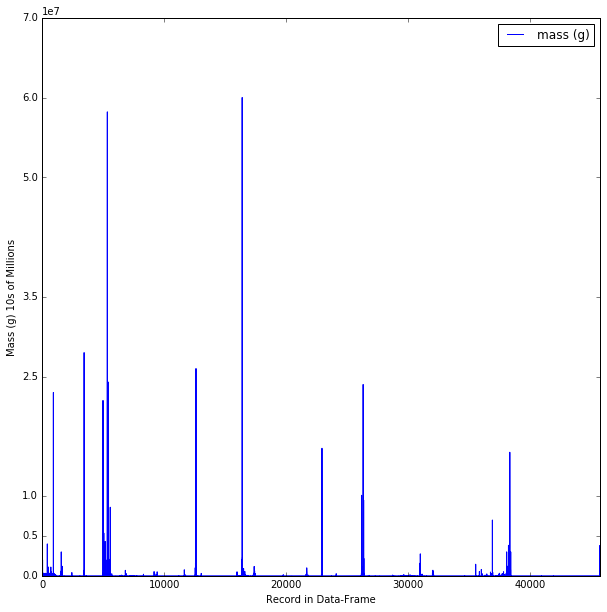

In [105]:
ax = refinedNASA[['mass (g)']].plot(kind="line", figsize=(10,10))
ax.set_xlabel("Record in Data-Frame")
ax.set_ylabel("Mass (g) 10s of Millions")
ax.set_yticks([0, 5000000, 10000000,25000000,35000000, 50000000,60000000, 70000000])
plt.show()

In this next plot, a pie chart was used to show the number of metorites recorded in each year, the years which had less that 200 metorites were grouped together, to make the chart easier to see and to show all the labels clearly.

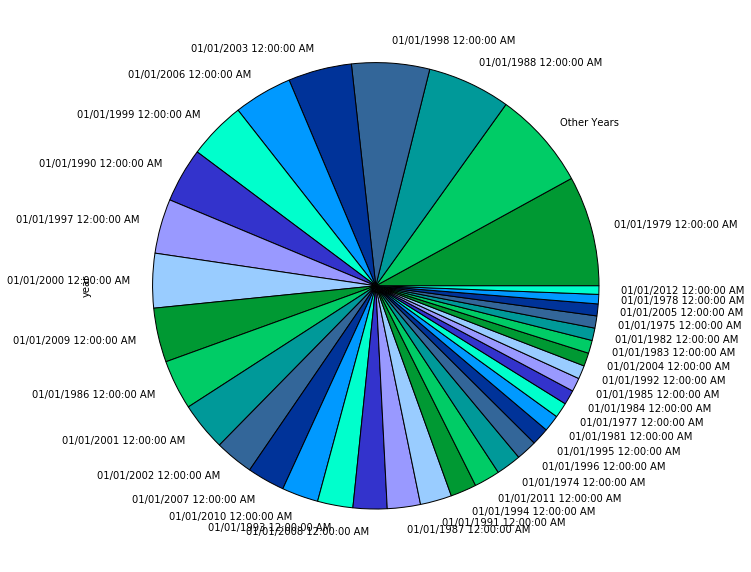

In [6]:
colors = ['#009933', '#00cc66', '#009999', '#336699', '#003399', '#0099ff', '#00ffcc', '#3333cc', '#9999ff', '#99ccff']

data = refinedNASA.copy()
possibleYears = data.year.unique()
rowsToRemove = []

years = data['year']  
for possible in possibleYears:
    rCounter = 0
    flag = 1
    tempRows = []
    for year in years:
                if possible == year:
                    flag = flag +1
                    if rCounter not in tempRows:
                        tempRows.append(rCounter)
                rCounter = rCounter + 1
    if flag < 200:
        for num in tempRows:
            if num not in rowsToRemove:
                rowsToRemove.append(num)

            
linesToAdd = len(rowsToRemove)
rowsToRemove.sort(reverse=True)
for i in rowsToRemove:
    data = data.drop(data.index[[i]])
    
for i in range(0, linesToAdd):
    line = pd.DataFrame([[1,1,1,1,1,1, "Other Years" ,1,1,1]], columns=['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation'])
    data = data.append(line, ignore_index=True)

data['year'].value_counts().plot(kind="pie", colors = colors, figsize=(10,10))

plt.show()

This interactive widget allows the user to look at the locations where Meteorites have fallen. To make it actually usable, the list of meteorites had to be limited, otherwise the list of them takes too long to generate and can sometimes crash the notebook due to the sheer number of records. The axes are as accurate as they could be made in accordance with the numbers on the map background image. The tab for the options available takes a bit of time to open, but if you give it a minute it will open.

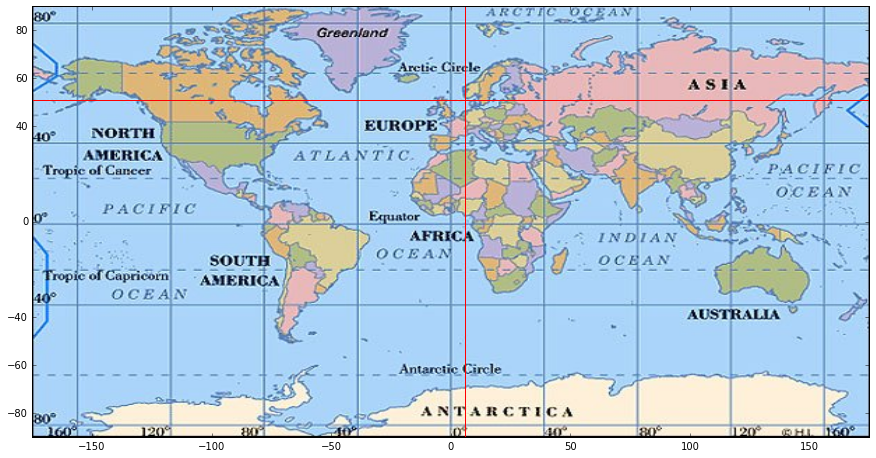

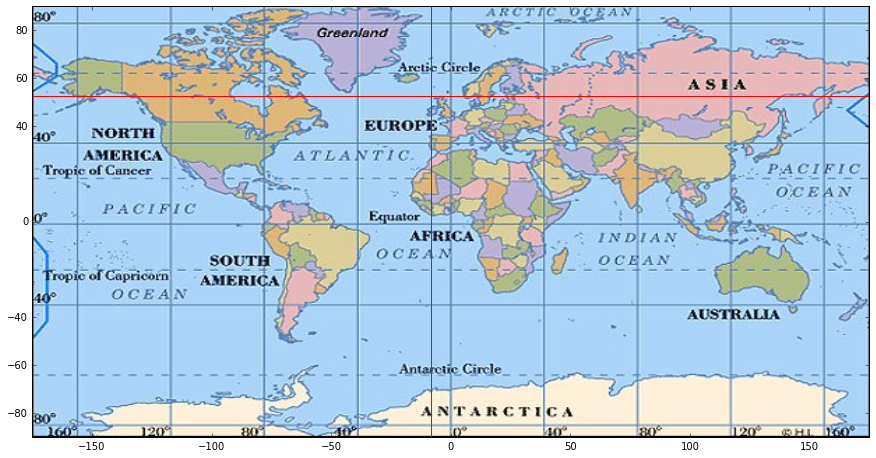

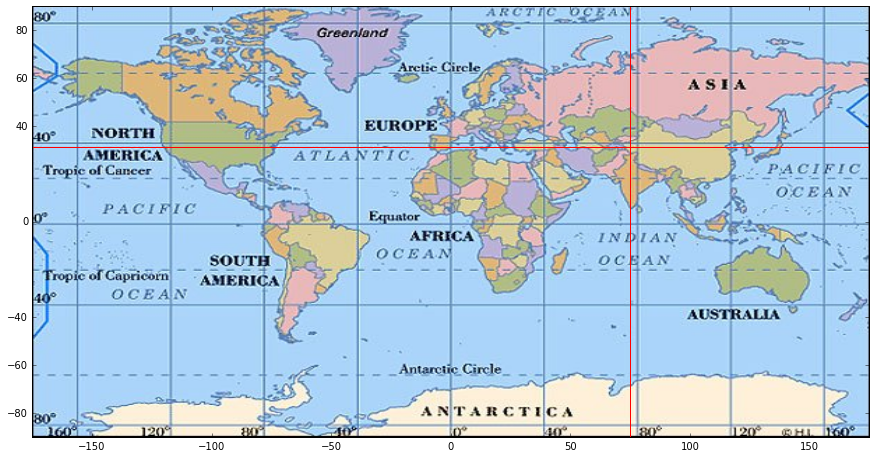

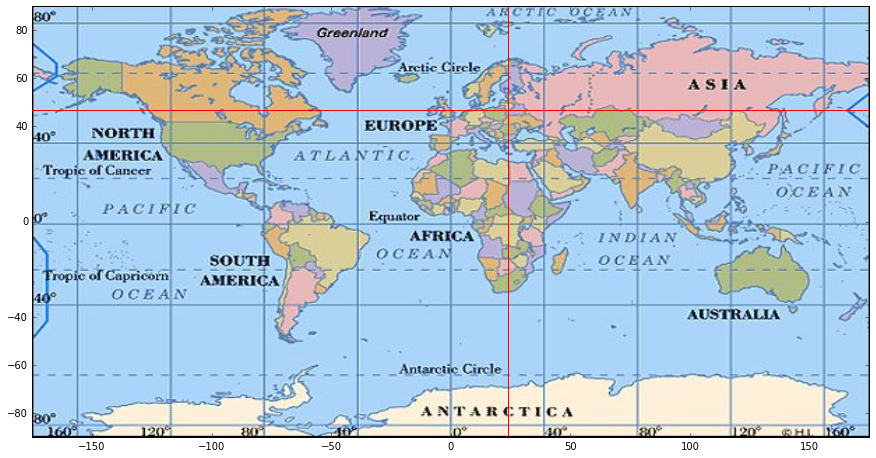

In [5]:
img = imread("world-latitudes.jpg")
name = list(refinedNASA.name.unique())
names = name[::3]

def update(Meteorite = names):

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(1, 1, 1)

    data = refinedNASA[(((refinedNASA['name'] == Meteorite)))]
    geo = data.GeoLocation.iloc[0]
    numbers = geo.split("(")
    numbers = numbers[1].split(")")
    numbers = numbers[0].split(", ")
    latitude = numbers[0]
    longitude = numbers[1]

    ax.set_yticks([-80,-60, -40, 0, 40,60, 80])
    ax.imshow(img, extent=[(-175),175,(-90),90])
    ax.axhline(y=(float(latitude)), color='red')
    ax.axvline(x=(float(longitude)), color='red')

    fig.canvas.draw()

interact(update);